# Project 2: College Admissions & SDPD

### Due at 11:59pm on June 3, 2020.

We will be exploring 2 topics in this project.

In the first half of this project, you will analyze college admission statistics and discover many interesting insights about the evolution of gender discrimination in college admissions and enrollment.

In the second half of this project, we will shift gears to some data from SDPD (San Diego Police Department) about analyzing police calls and how the COVID-19 situation has affected the trend in reports.

### Logistics


**Free Response Questions**: The free response questions and plots for the project are **optional** and ungraded, meaning you do **not** need to submit a PDF of this notebook to Gradescope. These questions tend to be open-ended. However, these questions will be very good practice for the free-response exam questions, so do give them a good effort. Solutions will be posted after the project late submission deadline.

**Partners.** You may work with one other partner. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on the forum, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private forum post and the staff will respond.

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, run the following cell without modification.

In [1]:
# Don't change this cell; just run it

import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings; warnings.simplefilter('ignore')

from client.api.notebook import Notebook
ok = Notebook('project02.ok')
_ = ok.auth(inline=True)

# Outline

Here is a roadmap for this project:

* In Part 1, we'll seek to understand how college admission standards have been evolving regarding gender.
* In Part 2, we'll dive deeper and analyze discrimination in public/private institutions based on gender.
* In Part 3, we'll explore a new problem about SDPD police reports and how COVID-19 has affected them.
* In Part 4, we'll analyze which types of police reports have had significant changes.

Let's get started!

# College Statistics

## Part 1: Changes in Admission Rates

The graph below shows how the rates of women receiving degrees from institutions has changed over time.

<img src="admissions.png"/>

*SOURCE: National Center for Education Statistics*

Let's examine the graph in more detail. It is evident that the rates of women receiving all types of degrees has significantly increased from 1970 to 2011. Historically, women were less educated than men, and more men enrolled in and receieved degrees from colleges. There has been a lot of social progress in advocating for gender equality, which colleges have taken more seriously as time progressed. 

In the sections below, we will see if there is still a gender imbalance or not, as well as explore some other discriminatory factors like ethnicity for example.

## Part 2: Discrimination in Private/Public Institution Admissions

The college statistics dataset contains comprehensive information collected on institutions across the United States about their applicants, admissions, enrollment, student demographics, etc... In this section, we'll focus on admission discrimination against women and students of varying ethnicities. Admissions discrimination has been a prominent issue for a long time, instigating many lawsuits. Usually there had been insufficient evidence to further cases and enforce strict changes to admission policies. However, data does not lie and we will investigate the disparities through a series of analysis.

Run the cell below to examine data of colleges across the country and information about student demographics. 

***Note***: This is a large dataset with lots of columns, but we will focus on analyzing specific columns in this project. An important part of being a data scientist is being able to ask certain questions and identifying specific data needed to answer them. You are welcome to analyze other parts of this data (there are lots of different questions you can ask!), but you are not required to.

In [2]:
# Don't change, just run this cell
colleges = bpd.read_csv('college_statistics.csv')
colleges = colleges.assign(women_enrollment=colleges.get("Percent of total enrollment that are women")/100,
                           sector=colleges.get("Sector of institution").apply(
                           lambda x: "public" if x=="Public, 4-year or above" else "private")
)

colleges

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),women_enrollment,sector
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN,0.55,public
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN,0.61,public
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0,0.58,private
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN,0.44,public
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN,0.61,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,Averett University-Non-Traditional Programs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.59,private
1150,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0,79.0,59.0,502.0,580.0,490.0,570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN,0.60,public
1151,The Kingâ€™s College,3033.0,2158.0,127.0,57.0,45.0,540.0,630.0,510.0,600.0,...,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0,0.60,private
1152,Providence Christian College,122.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0,0.52,private


In [3]:
for i in colleges.columns:
    print(i)

Name
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
SAT Critical Reading 25th percentile score
SAT Critical Reading 75th percentile score
SAT Math 25th percentile score
SAT Math 75th percentile score
SAT Writing 25th percentile score
SAT Writing 75th percentile score
ACT Composite 25th percentile score
ACT Composite 75th percentile score
Estimated enrollment, total
Estimated enrollment, full time
Estimated enrollment, part time
Estimated undergraduate enrollment, total
Estimated undergraduate enrollment, full time
Estimated undergraduate enrollment, part time
Estimated freshman undergraduate enrollment, total
Estimated freshman enrollment, full time
Estimated freshman enrollment, part time
Estimated graduate enrollment, total
Estimated graduate enrollment, full time
Estimated graduate enrollment, part time
Number of students receiving an Associate's degree
Percent admitted - total
Admissions yield - t

### Section 1: Proportion of Women Enrollment in Institutions

##### Background

In this section, we will look at the disparity between women and men enrollment across colleges in the United States.
Particularly, there have been allgeations of [gender discrimination](https://www.washingtonpost.com/posteverything/wp/2015/07/30/achieving-perfect-gender-balance-on-campus-isnt-that-important-ending-private-colleges-affirmative-action-for-men-is/), which we will investigate in this part.

In our data, each row contains data about one institution. The column `women_enrollment` tells us the percentage of women enrolled in that college.

Run the cell below to take a peak at the data we have!

In [4]:
colleges.get("women_enrollment")

0       0.55
1       0.61
2       0.58
3       0.44
4       0.61
        ... 
1149    0.59
1150    0.60
1151    0.60
1152    0.52
1153    0.34
Name: women_enrollment, Length: 1154, dtype: float64

Before we begin our investigation into gender discrimination in admissions, we'll first look at the degree to which gender disparity exists on campuses. In particular, we will investigate whether or not there is a similar amount of women and men in the universities. 

In an ideal setting, there will be 50% male enrollment, and 50% female enrollment. However, this may not exactly be the case because it is unreasonable to strictly enforce these quotas. Instead, we should look to whether there could be a gender discrepancy by chance. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The proportion of women enrollment in a college campus in the data is equal to 50%, which indicates a gender balance between men and women enrollment. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The proportion of women enrollment in a college campus in the data is less than 50%, indicating gender disbalance between men and women enrollment.

We are going to use the difference between the observed proportion of female enrollment and the ideal proportion, 0.5, as our test statistic. The column `women_enrollment` in the `colleges` table contains the proportion of female enrollment for a particular college.

**Question 0.5:** From the provided Hypotheses and test statistic, what seems more reasonable to use, A/B Testing or the Standard Hypothesis Testing? Assign the variable `test` to one of the following choices. 

1. Standard Hypothesis Test
2. A/B Testing

In [5]:
#...test
test = 1
test

1

In [ ]:
_ = ok.grade('q2_1_0')

**Question 1**: What is the observed value of the statistic in the college statistics data?

In [6]:
#...observed_enrollment_distance
observed_enrollment_distance = colleges.get('women_enrollment').mean() - 0.5
observed_enrollment_distance

0.037265624999999969

In [ ]:
_ = ok.grade('q2_1_1')

**Question 2**: The array `enrollment_proportions` contains the ideal proportions of male and female enrollment in an institution. Complete the following code to simulate 5000 values of the statistic under the null hypothesis. For this problem, we will assume that the average college campus has 1,000 students, so we will sample 1,000 times from `enrollment_proportions` per iteration. You may add new lines of code, if desired.

*hint: use `np.random.multinomial` to create samples. How many do we sample? How do we convert to proportion?*

In [7]:
enrollment_proportions = np.array([0.5, 0.5])

enrollment_simulated_stats = np.array([])
N = 5000

for n in np.arange(N):
    sample = np.random.multinomial(colleges.shape[0], enrollment_proportions) / 1000
    simulated_stat = sample.item(1) - 0.5
    enrollment_simulated_stats = np.append(enrollment_simulated_stats, simulated_stat)
    
enrollment_simulated_stats

array([ 0.073,  0.075,  0.099, ...,  0.09 ,  0.077,  0.067])

In [ ]:
_ = ok.grade('q2_1_2')

**Question 3**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*Make sure to run this cell that draws the histogram, since it will be graded. But otherwise, nothing else in this question is graded.*

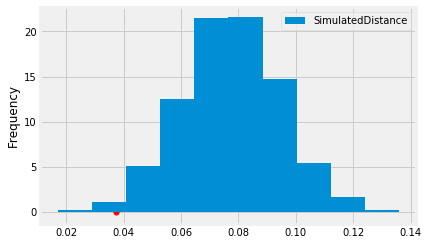

In [8]:
bpd.DataFrame().assign(SimulatedDistance=enrollment_simulated_stats).plot(kind='hist', density=True)
plots.scatter(observed_enrollment_distance, 0, color='red', s=30)

**Question 4**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis, and why? 

*Hint*: It may be tempting to immediately reject the null hypothesis if the observed statistic is not near the simulated distribution. However, remember to refer back to our hypotheses and think about how much the p-value is! When performing statistical tests in the real world, it's very likely you may not find many significant results.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 5**: As you read about above in Part 1, there seems to be a trend of greater women enrollment in higher education in the present compared to the past. Given this information, what reasons below may explain the outcome and conclusion of your hypothesis test? Assign the name `possibilities` to a list of choices of the following explanations that **are possible and consistent** with the information from Part 1 and hypothesis test results.

1. Social progress and advocation has led to more colleges adopting policies against gender discrimination, leading to a drastically larger proportion of women enrolled in higher education.
2. Women have become more concerned than men about their education and careers, leading to more women enrollment.
3. Governments have enforced all colleges to diregard gender as a consideration in admissions.
4. College admissions gradually became stricter on men in order to promote gender equality in enrollment.

In [9]:
possibilities = [1, 4]
possibilities

[1, 4]

In [ ]:
_ = ok.grade('q2_1_5')

It seems as though the gender imbalance of men and women in education is diminishing, which is great progress. In fact, the progress has come so far that there may appear to be even more women than men overall in college enrollment, which is the trend that is being observed, and forecasted to continue throughout the future. 

In the next part, we will go deeper into the data and examine if gender bias exists across select instituions.

*For more on the changes of women enrollment in higher education, you can check out this article: [Vox](https://www.vox.com/2015/2/17/8050259/discrimination-against-women-is-a-real-problem-in-college-admissions).*

### Section 2: Public and Private Institutions

Next, we are going to examine the association between the proportion of women enrollment in an institution, and whether the sector of the institution (whether it's public or private). There have been [concerns](https://www.washingtonpost.com/posteverything/wp/2015/07/30/achieving-perfect-gender-balance-on-campus-isnt-that-important-ending-private-colleges-affirmative-action-for-men-is/) growing over the private, elite colleges exercising more prejudice on women. This is because private institutions, like ivy-league schools, are mostly exempt from [*Title IX's ban on sex discrimination*](https://www2.ed.gov/about/offices/list/ocr/docs/tix_dis.html) in admissions, whereas public institutions are regulated by *Title IX*. Of course, this doesn't necessarily mean that private colleges are guranteed to be gender discriminatory, which is the question explored in this section.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** The proportion of women enrollment among private institutions is the same as the proportion of women enrollment among public institutions. Any observed difference is due to chance.

**Alternative Hypothesis:** The proportion of women enrollment among private institutions is less than the proportion of women enrollment among public institutions. The observed difference is not due to chance.

**Question 1:** From the provided Null and Alternative Hypotheses, what seems more reasonable to use, A/B Testing or the Standard Hypothesis Testing? Assign the variable `reasonable_test` to one of the following choices. 

1. Standard Hypothesis Test
2. A/B Testing

In [10]:
#...reasonable_test
reasonable_test = 2
reasonable_test

2

In [ ]:
_ = ok.grade('q2_2_1')

**Question 2:** To test the hypotheses above, we need a test statistic. 

A good statistic to use is: *the difference between the mean women enrollment rates of public institutions and private institutions.* 
**i.e.** if the mean women enrollment rate of public institutions was 0.7, and the mean women enrollment rate of private institutions was 0.4, the test statistic would be 0.7 - 0.4 = 0.3

Explain and justify why this statistic is reasonable to test the null/alternative hypotheses in two sentences or less.

*Hint*: Remember that larger values of the test statistic should favor the alternative hypothesis over the null.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Explanation:**

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 3**: Write a function called `compute_test_statistic` that computes your test statistic. It should take a table (colleges), with two columns, `sector` (public or private) and `women_enrollment` (proportion of women enrollment), and compute the test statistic you described above. 

In [11]:
def compute_test_statistic(tbl):
    return np.diff(tbl.groupby('sector').mean().get('women_enrollment'))[0]

In [ ]:
_ = ok.grade('q2_2_3')

**Question 4**: Use the function you defined above to compute the observed test statistic, and assign it to the name `colleges_observed_statistic`.

In [12]:
colleges_observed_statistic = compute_test_statistic(colleges)
colleges_observed_statistic

0.037469801026087102

In [ ]:
_ = ok.grade('q2_2_4')

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 5**: Write a function named `simulate_colleges_null` to simulate the test statistic under the null hypothesis. 

The `simulate_colleges_null` function should simulate the null hypothesis once (just once! not 1000 times) and return the value of the test statistic for that simulated sample.

In [13]:
def simulate_colleges_null():
    simulated_table = colleges.assign(sector=np.random.permutation(colleges.get('sector')))
    return compute_test_statistic(simulated_table)

In [14]:
# Run your function once to make sure that it works.
simulate_colleges_null()

0.00041497917715860311

In [ ]:
_ = ok.grade('q2_2_5')

**Question 6**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array `colleges_simulated_stats`.

*Hint*: You should use the function you wrote above in Question 5.

*Note*: **Warning**: running your code might take a few minutes!  We encourage you to check your `simulate_colleges_null()` code to make sure it works correctly before running this cell. 

In [16]:
colleges_simulated_stats = np.array([])

for _ in np.arange(1000):
    simulated_stat = simulate_colleges_null()
    colleges_simulated_stats = np.append(colleges_simulated_stats, simulated_stat)

The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic.

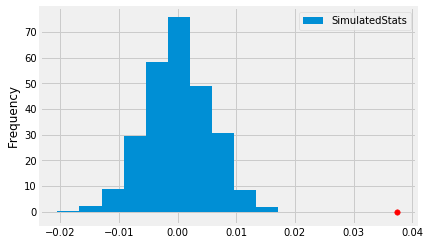

In [17]:
bpd.DataFrame().assign(SimulatedStats=colleges_simulated_stats).plot(kind='hist', density=True)
plots.scatter(colleges_observed_statistic, 0, color='red', s=30);

**Question 7**: Compute the p-value for this hypothesis test, and assign it to the name `colleges_p_value`.

*Hint*: Don't worry if you think the p-value is too extreme. Recall that a significantly low p-value shows that the observed statistic isn't very likely to have occurred by chance. Since private instituions aren't obliged under Title IX, there may be more cases of gender imbalance.

In [18]:
#...colleges_p_value
colleges_p_value = np.count_nonzero(colleges_observed_statistic <= colleges_simulated_stats) / 1000
colleges_p_value

0.0

In [ ]:
_ = ok.grade('q2_2_7')

**Question 8**: Given the results of the simulation above and the calculated p-value, what can we say about the conclusion of the hypothesis test *(do we reject or fail to reject the null)*? That is, are the proportions of women enrollment in public and private institutions different or the same?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

### Section 3: Geographic Location

Is it necessarily the case that private institutions discriminate based on gender? In this section, we will explore this question using confidence intervals and explore one possible confounder which is the geographic region of the institution, reported in the column `Geographic region`.

To begin the exploration, you will (re)implement the investigation into the association between women enrollment rate and sector of institution using confidence intervals, which we'll also use to examine the role of how other factors, such as geographic location, plays in the association.

Using confidence intervals to investigate the possible association between women enrollment rate and the sector of the institution. We'll use the following null and alternative hypotheses:

**Null Hypothesis**: The average women enrollment rate of private institutions is drawn from the same distribution as the overall population of institutions; differences are due to chance.

**Alternative Hypothesis**: The average women enrollment rate of private institutions is lower than the women enrollment rate of the overall population; differences are not due to chance.

**Question 1** Calculate the average women enrollment of private institutions and assign it to the name `private_mean_enrollment`.

In [19]:
#...private_mean_enrollment
private_mean_enrollment = colleges[colleges.get('sector') == "private"].get('women_enrollment').mean()
private_mean_enrollment

0.51901861252115056

In [ ]:
_ = ok.grade('q2_3_1')

**Question 2**: Using bootstraping, calculate 5000 estimates of the *average women enrollment* from the population and store them in an array `enrollment_means`. 

*It may take a few minutes to run, which is fine.*

In [22]:
enrollment_means = np.array([])

for _ in np.arange(5000):
    resample = colleges.sample(colleges.shape[0], replace=True)
    enrollment_mean = resample.get('women_enrollment').mean()
    enrollment_means = np.append(enrollment_means, enrollment_mean)

In [ ]:
_ = ok.grade('q2_3_2')

**Question 3**: Fill in the function below to calculate the 95% confidence interval of the inputted `means` array. We will use this function to calculate the 95% confidence interval of the *average women enrollment* of institutions in our data. (Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.)

In [23]:
def calculate_ci(means):
    #calculate lower bound
    lower = np.percentile(means, 2.5)
    
    #calculate upper bound
    upper = np.percentile(means, 97.5)
    
    return lower, upper

In [24]:
lower_bound, upper_bound = calculate_ci(enrollment_means)

print("95% Confidence interval: ", "[{0}, {1}]".format(lower_bound, upper_bound))

95% Confidence interval:  [0.5321059511473318, 0.5425824906230284]


In [ ]:
_ = ok.grade('q2_3_3')

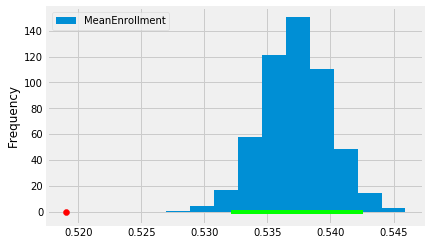

In [25]:
bpd.DataFrame().assign(MeanEnrollment=enrollment_means).plot(kind='hist', density=True)
plots.plot([lower_bound, upper_bound], [0, 0], color='lime')
plots.scatter([private_mean_enrollment], [0], color='r');

**Question 4**: Interpret your results from the plot displayed above. Should you reject the null hypothesis, and what conclusion can you make with the confidence interval and calculated statistic about the women enrollment rate of private institutions?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

You are now going to test for an association between women enrollment and institution sector *while controlling for* the geographic region of the college. The column `Geographic region` contains data about the region of each institution. This means that in the simulation, you will select subpopulations of each region and separately test for an association in each of those subpopulations. You will do this using the following procedure:

1. In the outter for-loop, loop through each region in the dataset.
2. For all colleges within that certain region:
    - Compute the 95% confidence interval of the *average women enrollment* as in question 3 above. Use 5000 simulations to compute each bootstrap. You may reuse the `calculate_ci` function you defined above.
    - Compute the *average women enrollment* of institutions that are in the private sector.
    
In the end, you should have nine groups of regions, each with its own confidence interval and observed test statistic.

**Question 5**: Using the code skeleton below, simulate the bootstrap procedure sketched out above. Save the confidence intervals in a list called `enrollment_ci_by_region` and the observed statistics in a list called `enrollment_mean_by_region`.

*Note*: The elements of `enrollment_ci_by_region` should be lists.
*Note*: You may want to reduce the number of simulations while you're developing your code! However, in your final submission, make sure your code runs 5000 simulations. It will take a while for it to run.

In [27]:
regions = np.unique(colleges.get('Geographic region'))

enrollment_ci_by_region = []
enrollment_mean_by_region = []

for i in regions:
    # Use bootstrap for the region
    region = colleges[colleges.get('Geographic region') == i]
    
    enrollment_means = []
    for _ in np.arange(5000):
        resample = region.sample(region.shape[0], replace=True)
        enrollment_mean = resample.get('women_enrollment').mean()
        enrollment_means.append(enrollment_mean)

    # Now record the confidence interval and test statistic
    lower_bound, upper_bound = calculate_ci(enrollment_means)
    ci = [lower_bound, upper_bound]
    enrollment_ci_by_region.append(ci)
    
    private_mean = region[region.get('sector') == 'private'].get('women_enrollment').mean()
    enrollment_mean_by_region.append(private_mean)

print(enrollment_ci_by_region)
print(enrollment_mean_by_region)

[[0.52946205357142861, 0.55901785714285712], [0.52229371584699458, 0.54710382513661204], [0.51502153110047855, 0.5398086124401914], [0.49864322916666665, 0.54396093750000007], [0.51916666666666667, 0.54641875000000006], [0.50666666666666671, 0.54810119047619044], [0.53773149255831965, 0.55962202549074991], [0.53030612244897968, 0.56193927519461395], [0.14999999999999999, 0.14999999999999999]]
[0.53072727272727271, 0.52396396396396405, 0.51790000000000003, 0.49862068965517242, 0.52057971014492754, 0.55384615384615377, 0.51812499999999995, 0.51097560975609757, nan]


In [ ]:
_ = ok.grade('q2_3_5')

The cell below plots each confidence interval and the corresponding test statistic for each (range of) value(s) of diastolic blood pressure. The x-axis is diastolic blood pressure, the y-axis is total cholesterol.

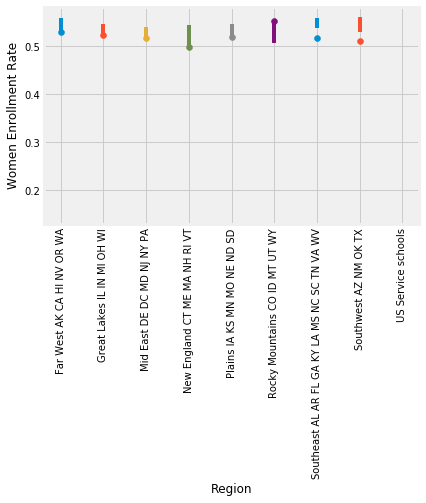

In [28]:
# Run this cell; DO NOT CHANGE THIS CELL

for k, ci, stat in zip(regions, enrollment_ci_by_region, enrollment_mean_by_region):
    plots.plot([k,k], ci)
    plots.scatter([k], [stat])
    plots.xticks(rotation=90)
    
plots.xlabel('Region')
plots.ylabel('Women Enrollment Rate');

**Question 6**: Assign `enrollment_explanations` to a list of the following statements that are possible and consistent with the observed data/plot above.

1. There is no association between women enrollment and sector of institution across the regions of the country.
2. There may be an assocation between women enrollment and sector of institution in the southern area of the country.
3. There is no assocation between women enrollment and sector of institution in the southern area of the country.
4. There is not a significant association between women enrollment and sector of institution in the far western area of the country.

In [29]:
#...enrollment_explanations
enrollment_explanations = [2, 4]

In [ ]:
_ = ok.grade('q2_3_6')

### Summary
Overall, we have analyzed the enrollment rates of men and women in institutions across the country and saw how evolving trends of admission standards. We did these analyses through statistical tests and confidence intervals. An important part of data science is to interpret the results we make by connecting to other data and information sources. We connected results generated to current trends in society, which is an essential part of a data scientist.

#### Run the below cell to generate a backup submission for the work you have done so far.

In [ ]:
_ = ok.submit()

# SDPD Police Calls

## Part 3: Police Call Trends

We now move on to a new topic, SDPD (San Diego Police Department) police calls/reports. As you know, the COVID-19 situation has greatly affected many areas of our society, most likely including police reports. This is because more people have inclined to stay at home, as stores and other places close. As a result, the amount of police reports, as well as the type of reports, may have likely changed as well. In the following sections, we will explore these questions and discover how police reports have changed from COVID-19, using data from SDPD.


You can read more about the data here: https://data.sandiego.gov/datasets/police-calls-for-service/

![website](website.PNG)

In [30]:
policeCalls = bpd.read_csv("pd_calls_for_service_2020_datasd.csv")
policeCalls

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198740,E20050003524,2020-05-02 23:31:30,7,0,NaN,EL CAJON,BLV,NaN,MC CLINTOCK,NaN,PARTY,K,838,3
198741,E20050003533,2020-05-02 23:36:11,7,0,NaN,HARBOR,DR,NaN,SIGSBEE,NaN,10851,DUP,511,0
198742,E20050003537,2020-05-02 23:38:18,7,0,NaN,PARK,BLV,NaN,NaN,NaN,10851,CAN,511,1
198743,E20050003542,2020-05-02 23:42:19,7,6500,NaN,MISSION GORGE,RD,NaN,NaN,NaN,CW,K,321,1


### Section 1: Analyzing Police Call Trends

In this section, we will be analyzing the trends of increases and decreases in overall and different types of police calls. We will examine how COVID-19 may have impacted the trends of reports that occurred through statistical analyses and data visualization. We will use March 15th (3-15) as the benchmark date for when COVID-19 may have began impacting police reports. Let's get started!

**Question 1**: The column `date_time` in the policeCalls table contains the date and time of each incident report. We are particularly interested in examining the dates of incidents, so we will extract out just the dates. 

Define a function `getDate` below that takes in a datetime value and returns only the date. For example, if the datetime value is `2020-10-20 22:32:12`, then the function should return only `2020-10-20`.

*Hint: How do we split a string value into 2 separate values?*

In [31]:
def getDate(datetime):
    return datetime.split(" ")[0]

Now that we have our function, we can apply it to the `date_time` column in our data and get a column of the dates of each incident report. Run the code cell below to make sure your function works correctly. You should have a new column `date` that holds the value of the date of the incident.

In [32]:
dateColumn = policeCalls.get('date_time').apply(getDate)
policeCalls = policeCalls.assign(date = dateColumn) 
policeCalls

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,date
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0,2020-01-01
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2,2020-01-01
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1,2020-01-01
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2,2020-01-01
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198740,E20050003524,2020-05-02 23:31:30,7,0,NaN,EL CAJON,BLV,NaN,MC CLINTOCK,NaN,PARTY,K,838,3,2020-05-02
198741,E20050003533,2020-05-02 23:36:11,7,0,NaN,HARBOR,DR,NaN,SIGSBEE,NaN,10851,DUP,511,0,2020-05-02
198742,E20050003537,2020-05-02 23:38:18,7,0,NaN,PARK,BLV,NaN,NaN,NaN,10851,CAN,511,1,2020-05-02
198743,E20050003542,2020-05-02 23:42:19,7,6500,NaN,MISSION GORGE,RD,NaN,NaN,NaN,CW,K,321,1,2020-05-02


In [ ]:
_ = ok.grade('q3_1_1')

**Question 2**: The column `incident_num` represents the id of the incident that was recorded in the corresponding row. It will be useful to observe how many `incident_num` values occur on each date. We will visualize this with a time-series line plot, with the x-axis as date and the y-axis as the count of incident numbers on a particular date.

Create a time-series line plot of the count of `incident_num` by date.

*Hint: How do you get the count of incident_num by each date in the data?*

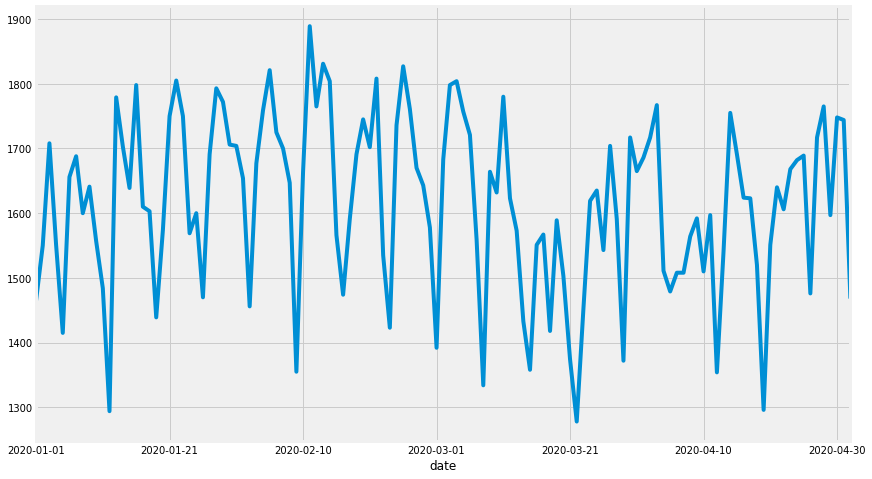

In [33]:
countByDay = policeCalls.groupby('date').count().get('incident_num')
fig = plots.gcf()
fig.set_size_inches(13, 8)
countByDay.plot()

In [ ]:
_ = ok.grade('q3_1_2')

Looking at the plot, it appears that something happened in the time period right around March 15th this year that caused incident reports to drop. Let's investigate further about what might've happened. Specifically, we want to test whether police calls dropped significantly 30 days after March 15th, compared to before March 15th.

We'll use the following null and alternative hypotheses:

**Null Hypothesis**: The amount of police calls did not drop from 30 days before March 15th to after March 15th.

**Alternative Hypothesis**: The amount of police calls dropped from 30 days before March 15th to after March 15th.

For this simulation, we will use the percent drop in mean number of police calls as our test statistic. That is, we will compute the test statistic as:
    
    100 * (mean number of calls before 3/15 - mean number of calls after 3/15) / (mean number of calls before 3/15)

**Question 3**: Would larger values of the test statistic favor the null hypothesis or the alternative hypothesis? Explain your reasoning.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 4**: Start by creating 2 tables, one with all dates before and including 3-15 and another with dates after 3-15. We want 2 tables, one with dates before `2020-03-15`, and another table with dates after.

*Hint: Dates in the format `YYYY-MM-DD` are really nice to work with [for a lot of reasons](https://en.wikipedia.org/wiki/ISO_8601).  Python has a `datetime` module that will let you calculate days between, but because of the format the date order and the alphabetical order with strings is the same!  So `date < '1970-01-01'` will only be true for 1969 and earlier.*

In [34]:
policeCallsBefore = policeCalls[policeCalls.get('date') <= "2020-03-15"]
policeCallsAfter = policeCalls[policeCalls.get('date') > "2020-03-15"]

In [ ]:
_ = ok.grade('q3_1_4')

**Question 5**: When performing our test, we will have to get the number of incidents for dates before/including 3-15 and after. Instead of calculating it repetitively during each iteration like we did above, it is better to define a function. Fill in two functions below, `getCountsByDayBefore` and `getCountsByDayAfter` that both take in a dataframe and outputs a dataframe with one column, `incident_num` that contains the counts of incident reports by each date. The first function should return the counts before 3-15, and the second should return the counts after 3-15.

In [35]:
def getCountsByDayBefore(table):
    beforeTable = table[table.get('date') <= "2020-03-15"]
    return beforeTable.groupby('date').count().get('incident_num')

def getCountsByDayAfter(table):
    beforeTable = table[table.get('date') > "2020-03-15"]
    return beforeTable.groupby('date').count().get('incident_num')

In [ ]:
_ = ok.grade('q3_1_5')

**Question 6**: Next, we will create a function to calculate our test statistic. Remember that the statistic we are using is the percent drop (take a look above if you don't remember how to calculate it). Complete the function below that takes in 2 numbers, the number of reports before/including 3-15 and the number of reports after 3-15, and outputs the test statistic, percent drop.

In [36]:
def getPercentDrop(callsBefore, callsAfter):
    return (callsBefore.mean() - callsAfter.mean())*100/callsBefore.mean()

In [ ]:
_ = ok.grade('q3_1_6')

Now, we can calculate the observed statistic from our data. Run the cell below to output the observed percent drop in calls.

In [37]:
#Run this cell
dailyCountBefore = getCountsByDayBefore(policeCalls)
dailyCountAfter = getCountsByDayAfter(policeCalls)

observedDrop = getPercentDrop(dailyCountBefore, dailyCountAfter)

**Question 7**: We will now perform the bootstrapping to test out hypotheses. Run 10,000 iterations by bootstrapping from the columns of counts of incident reports above, `dailyCountBefore` and `dailyCountAfter`, and compute the percent drop test statistics. You may add more lines or define more functions if you wish.

*Hint: Recall how to bootstrap from an array of numbers. Do we sample with or without replacement? The `np.random.choice` function may be particularly useful.*

In [38]:
N = 10000

dropPercents = np.array([])
for _ in np.arange(N):
    sampledBefore = np.random.choice(dailyCountBefore, len(dailyCountBefore), replace=True)
    sampledAfter = np.random.choice(dailyCountAfter, len(dailyCountAfter), replace=True)
    dropPercent = getPercentDrop(sampledBefore, sampledAfter)
    dropPercents = np.append(dropPercents, dropPercent) 

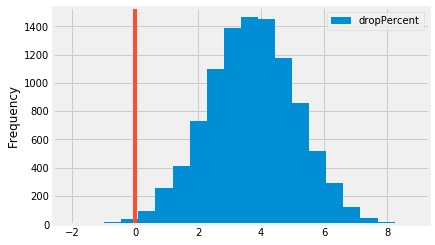

In [39]:
#Don't change, just run
df = bpd.DataFrame()
df = df.assign(dropPercent=dropPercents)
df.plot(kind='hist', bins = 20)
plots.axvline(0, color='C1')

In [40]:
print("p-value: ", np.count_nonzero(dropPercents < 0) / N)

p-value:  0.005


In [ ]:
_ = ok.grade('q3_1_7')

**Question 8**: Looking at the plot and calculated p-value, what can we say about the null hypothesis? Is it likely that the calls did not drop after 3-15?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 9**: We will be reusing some of the bootstrapping code in a later part, so it is good to pack everything within a function so we can easily access it later on. Complete the function `get_p` that takes in 2 tables, before and after, and runs the bootstrap with them like above, and returns the p-value.

In [41]:
def get_p(before, after):
    N = 10000

    dropPercents = np.array([])
    for _ in np.arange(N):
        sampledBefore = np.random.choice(before, len(before), replace=True)
        sampledAfter = np.random.choice(after, len(after), replace=True)
        dropPercent = getPercentDrop(sampledBefore, sampledAfter)
        dropPercents = np.append(dropPercents, dropPercent) 
    return np.count_nonzero(dropPercents < 0) / N

In [ ]:
_ = ok.grade('q3_1_9')

### Caveat

Bootstrapping is for samples from a population, and the time series isn't really a sample, but rather the full record.

The assumption made here is that the number of police calls every day can be modeled as a random data generating process with some true underlying properties.  The model we just made assumes that is unchanging over time before March 15, and then suddenly changes, and then is unchanging again after.  In statistics we call a time-series with a fixed random process *stationary* or *ergodic*.  

So in this case, we assume that the number of calls every day is a random realization of some real underlying data generating process.

## Section 2: Police Call Types
Now we will take a deeper dive into the different types of police calls made and analyze which calls are the most common. We will then explore the trends of calls before COVID-19 ocurred and after to discover insights about what kinds of trends changed.

**Question 1**: We are going to analyze the distribution of call types in the data. To do so, create a barchart of the top 10 most common call types sorted from greatest to least. You may add more lines if you wish.

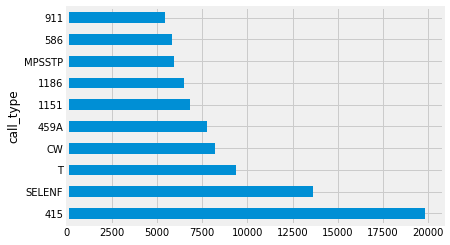

In [42]:
callCounts = policeCalls.groupby("call_type").count().get("incident_num")
topCalls = callCounts.sort_values(ascending=False)
topCalls = topCalls.take(np.arange(10))
topCalls.plot(kind="barh")

In [ ]:
_ = ok.grade('q3_2_1')

We may have run into an issue with understanding our data. Any idea what a 459A or a 415 is? This is a common issue with data, and it is important to fully understand the terms we are dealing with. A common solution is to take another table to look up the meanings.

Check out this site: https://data.sandiego.gov/datasets/police-calls-for-service/

You can perform a merge with several different columns, police beat to disposition code. Let's load the data from the source and take a look at the descriptions.

In [43]:
callTypes = bpd.read_csv("pd_cfs_calltypes_datasd.csv")
callTypes

,call_type,description
0,10,"OUT OF SERV, SUBJTOCALL"
1,10-97,ARRIVE ON SCENE
2,1016,PRISONER IN CUSTODY
3,1016PT,PTU (PRISONER TRANSPORT)
4,1016QC,SHOPLIFTER/QUICK CITE
...,...,...
300,TPURS,TRAFFIC PURSUIT
301,TPURSCR,TRAFFIC PURSUIT-COST REC
302,TRO,"TRO VIOLATION, REPORT"
303,VARDA,VARDA ALARM


**Question 2**: Now that we have a table with call type definitions, we can perform a merge. Join the `callTypes` table with `policeCalls` and store the result as `policeCalls`.

In [44]:
policeCalls = policeCalls.merge(callTypes, left_on="call_type", right_on="call_type")
policeCalls

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,date,description
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0,2020-01-01,PERSON DOWN
1,E20010000048,2020-01-01 00:10:42,4,800,NaN,05TH,AVE,NaN,NaN,NaN,11-8,K,523,0,2020-01-01,PERSON DOWN
2,E20010000099,2020-01-01 00:27:11,4,3900,NaN,MISSION,BLV,NaN,NaN,NaN,11-8,K,121,0,2020-01-01,PERSON DOWN
3,E20010000192,2020-01-01 01:10:23,4,500,NaN,06TH,AVE,NaN,NaN,NaN,11-8,R,523,0,2020-01-01,PERSON DOWN
4,E20010000204,2020-01-01 01:20:17,4,3600,NaN,WITHERBY,ST,NaN,NaN,NaN,11-8,CAN,611,0,2020-01-01,PERSON DOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191281,E20040033015,2020-04-20 20:58:20,2,4300,NaN,Z,ST,NaN,NaN,NaN,330,K,441,3,2020-04-20,GAMBLING
191282,E20030010121,2020-03-06 17:05:29,6,1400,NaN,BROADWAY,NaN,NaN,NaN,NaN,AMBER,W,521,1,2020-03-06,AMBER ALERT INFO
191283,E20030020083,2020-03-12 13:12:55,5,3700,NaN,04TH,AVE,NaN,NaN,NaN,C12,A,627,1,2020-03-12,SWAT EMERGENCY RESPONSE
191284,E20040049203,2020-04-30 05:40:11,5,4500,NaN,NIMITZ,BLV,NaN,NaN,NaN,FC,O,613,4,2020-04-30,FRONT COUNTER CLOSURES


In [ ]:
_ = ok.grade('q3_2_2')

**Question 3**: Now, recreate the barchart you made above with the `description` column that has the description of the call.

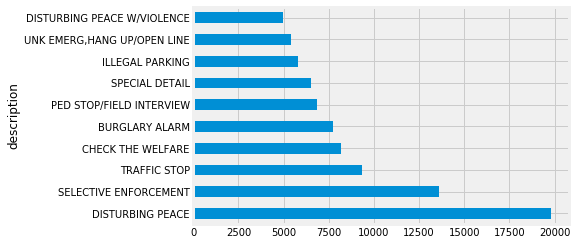

In [45]:
callCounts = policeCalls.groupby("description").count().get("incident_num")
topCalls = callCounts.sort_values(ascending=False)
topCalls = topCalls.take(np.arange(10))
topCalls.plot(kind="barh")

In [ ]:
_ = ok.grade('q3_2_3')

**Question 4**: Now we will go a little more in depth by looking at the most common call types that occurred before 3-15 and after 3-15. Notice that our code will get a little repetitive, so we will define a function.

Define a function `plotByDay` that takes in a table with columns like policeCalls and returns a barchart of the 10 most common call type descriptions, sorted from greatest to least. 

*Hint: This is very similar to what you did above, except the table we are using is different based on whether or not we are using incidents before or after 3-15.*

In [46]:
def plotByDay(table):
    callCounts = table.groupby("description").count().get("incident_num")
    topCalls = callCounts.sort_values(ascending=False)
    topCalls = topCalls.take(np.arange(10))
    return topCalls.plot(kind="barh")

In [ ]:
_ = ok.grade('q3_2_4')

Run these cells below to visualize the most common types of calls before and after 3-15.

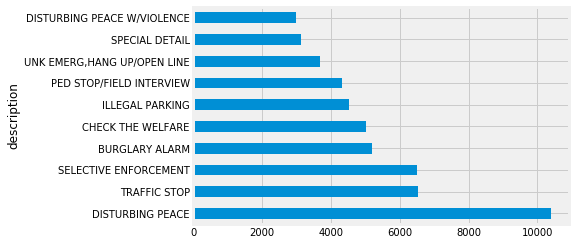

In [47]:
#Calls before 3-15
policeCallsBefore = policeCalls[policeCalls.get('date') <= "2020-03-15"]
plotByDay(policeCallsBefore)

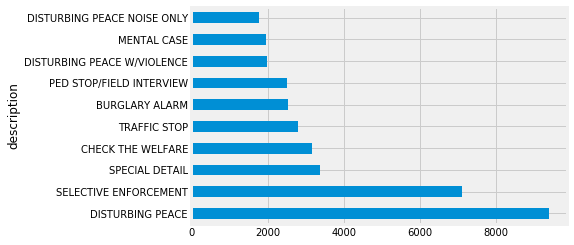

In [48]:
#Calls after 3-15
policeCallsAfter = policeCalls[policeCalls.get('date') > "2020-03-15"]
plotByDay(policeCallsAfter)

We have now explored some of the calls that are present in the data and their distributions. We will now go into a deeper analysis of these types of calls and how some have changed because of the COVID-19 situation. 

**Question 5**: What interesting things do you notice when comparing the two plots above? Have the number of police calls relatively increased or decreased after 3-15? What call types increased in frequency, and which ones decreased? You don't have to expliciitly state every difference, but note at least 3-4 differences you observe.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

In this section, we saw trends in different police call types and how they've changed before and after March 15, which is the benchmark we used for COVID-19. Data visualization makes it easy for us to get a quick glance at how categories differ relative to each other. In the next section, we will expand and go deeper into this topic by quantifying the changes through statistical analyses.

## Part 4: Deeper Analysis of Police Call Changes
We will now go more in-depth of how police calls have changed over time and find some possible explanations. Because of the COVID-19 situation, many shelter-in-place orders have enforced people to stay at home. This will greatly increase certain types of police reports, while reducing others. We will work with time-series regression and continue the hypotheses testing we did in the previous parts for a wider range of police reports.

### Section 1:  Which Call Types Dropped the Most?
As we may have noticed from the previous part, some types of calls seemed to have suddenly dropped after 3-15, which may be a consequence of COVID-19. We will now explore how specific types of calls have changed by analyzing the percentage drop as well as hypotheses testing to generate p-values.

**Question 1**: Write a function called `filterByDescription` that takes in a table and a description string, and outputs a table with same columns as policeCalls, but only with description matching the inputted description.

For example, 

```
d = "TRAFFIC STOP"
filterByDescription(policeCalls, d)
```

will give back a table with the same columns as policeCalls, but with only traffic stops.

In [49]:
def filterByDescription(policeCalls, description):
    return policeCalls[policeCalls.get('description') == description]

In [50]:
#Run this cell to test your code
description = "TRAFFIC STOP"
traffic = filterByDescription(policeCalls, description)
traffic

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,date,description
24388,E20010000042,2020-01-01 00:09:48,4,0,NaN,BALBOA,AVE,NaN,MOUNT CULEBRA,NaN,T,O,112,2,2020-01-01,TRAFFIC STOP
24389,E20010000160,2020-01-01 00:59:38,4,8800,NaN,CAPRICORN,WAY,NaN,NaN,NaN,T,K,242,2,2020-01-01,TRAFFIC STOP
24390,E20010000165,2020-01-01 01:01:09,4,4500,NaN,CASS,ST,NaN,NaN,NaN,T,CAN,122,2,2020-01-01,TRAFFIC STOP
24391,E20010000166,2020-01-01 01:01:13,4,4500,NaN,CASS,ST,NaN,NaN,NaN,T,K,122,2,2020-01-01,TRAFFIC STOP
24392,E20010000258,2020-01-01 01:50:25,4,3900,NaN,HIGHLAND,AVE,NaN,NaN,NaN,T,K,833,2,2020-01-01,TRAFFIC STOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33730,E20050003172,2020-05-02 19:32:29,7,4300,NaN,GRESHAM,ST,NaN,NaN,NaN,T,O,122,2,2020-05-02,TRAFFIC STOP
33731,E20050003249,2020-05-02 20:11:51,7,4400,NaN,CASS,ST,NaN,NaN,NaN,T,O,122,2,2020-05-02,TRAFFIC STOP
33732,E20050003340,2020-05-02 21:14:17,7,3400,NaN,DEL MAR HEIGHTS,RD,NaN,NaN,NaN,T,K,934,2,2020-05-02,TRAFFIC STOP
33733,E20050003360,2020-05-02 21:25:50,7,0,NaN,42ND,ST,NaN,MARKET,NaN,T,K,444,2,2020-05-02,TRAFFIC STOP


In [ ]:
_ = ok.grade('q4_1_1')

**Question 2**: Recall the bootstrapping test we did in Part 3. We can now analyze different call types and see if they've changed before and after 3-15. Previously, we had used all the data to perform a bootstrap, but now we can focus on specific call types. 

In the question below, create `before` and `after` that contain all traffic stop reports before 3-15 and after 3-15. Use the traffic table already defined to do this.

*Hint: Remember to always reuse your previous functions! `getCountsByDayBefore` and `getCountsByDayAfter` will be useful for getting tables with dates before and after 3-15.*

In [51]:
traffic = filterByDescription(policeCalls, description)
before = getCountsByDayBefore(traffic)  #reports of traffic stops before 3-15
after = getCountsByDayAfter(traffic)  #reports of traffic stops after 3-15

Rather than typing out all of the bootstrapping code again, we can simply call our functions to do the computation for us. We will use the `getPercentDrop` and `get_p` functions to compute the percent drop and p-value of whether the amount of calls have dropped or not after 3-15.

In [52]:
print("Percent Drop: ", getPercentDrop(before, after))
print("p-value: ", get_p(before, after))

Percent Drop:  33.0050061143
p-value:  0.0


In [ ]:
_ = ok.grade('q4_1_2')

**Question 3**: Interpret the results of the bootstrapping test and percent drop. What can we say about the null hypothesis that the amount of traffic stop reports have not dropped from before 3-15 compared to after? Refer back to part 3 if you're having trouble interpreting. 

*Hint: Remember, the major difference between our test here and in part 3 is that we only look at traffic stop calls in this part, but looked at all calls in part 3.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Great! Now that we've taken a look at traffic stop calls, we want to do the same for more call types. We will examine how several types of calls have changed after 3-15.

**Question 4**: First, let's take the top 10 police calls we had made above and get the counts of each in an array. Store this in an array, `descriptionList`. This is similar to what you did above for `topCalls`. Then, sort `descriptionList` in descending order.

In [53]:
descriptionList = policeCalls.groupby("description").count().get("incident_num").sort_values(ascending=False).take(np.arange(10))

In [ ]:
_ = ok.grade('q4_1_4')

**Question 5**: Now, we will loop through each of the top 10 call descriptions and save both the percent drop and p-value in arrays. This is similar to what you ddi above for traffic stops, except we are looking at more descriptions.

*Note: Your code may take a while to run, since we are performing iterations for every description.*

In [54]:
descriptions = descriptionList.index
p_values = np.array([])
percentDrops = np.array([])
for description in descriptions:
    description_table = filterByDescription(policeCalls, description)
    before = getCountsByDayBefore(description_table)
    after = getCountsByDayAfter(description_table)
    percentDrops = np.append(percentDrops, getPercentDrop(before, after))
    p_values = np.append(p_values, get_p(before, after))

In [ ]:
_ = ok.grade('q_4_1_5')

Now that we have arrays of the p-values and percentage drops, we can visualize how different call types of changed before and after 3-15.

**Question 6**: Create a new table `changes` that has a row for each of the top 10 descriptions we examined above, with a column `p_values` for the p-values calculated and a column `percentDrop` for the percent drops calculated. Make sure you set the index of the table to the call descriptions. You may add more lines.

In [55]:
changes = bpd.DataFrame().assign(p_values=p_values, description=descriptions, percentDrop=percentDrops)

changes = changes.set_index("description")
changes

,p_values,percentDrop
description,,
DISTURBING PEACE,1.0000,-41.279670
SELECTIVE ENFORCEMENT,1.0000,-71.193978
TRAFFIC STOP,0.0000,33.005006
CHECK THE WELFARE,0.3591,1.058287
BURGLARY ALARM,0.0000,23.364959
PED STOP/FIELD INTERVIEW,0.0141,9.579385
SPECIAL DETAIL,1.0000,-68.292293
ILLEGAL PARKING,0.0000,55.579369
"UNK EMERG,HANG UP/OPEN LINE",0.0000,25.832312


Great! Now we can visualize the changes in different types of calls together so we can understand how certain types of calls have changed relative to one another. We can also observe the p-values as well to determine which calls seemed to have a statistically significant drop in count after 3-15. 

Run the cells below.

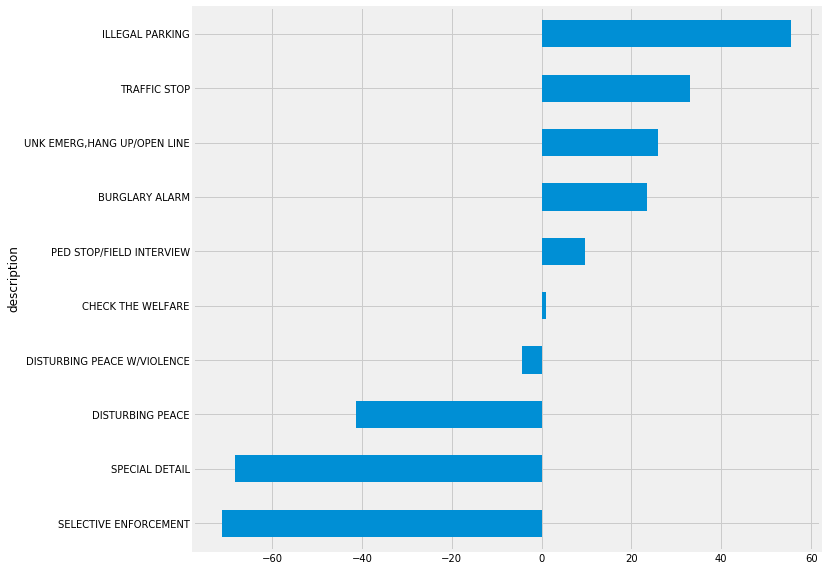

In [56]:
fig = plots.gcf()
fig.set_size_inches(10, 10)
changes.get("percentDrop").sort_values().plot(kind="barh")

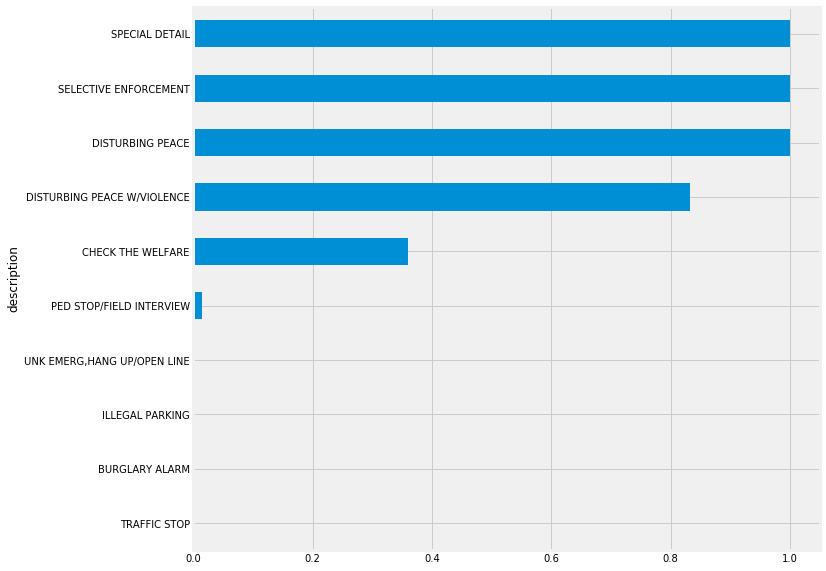

In [57]:
fig = plots.gcf()
fig.set_size_inches(10, 10)
changes.get("p_values").sort_values().plot(kind="barh")

**Question 7**: Examine the plots made above about percent drops and p-values of the diffeernt types of calls. What features do you notice? Which calls seemed to have the most significant changes of percent drops, and which drops are more likely to be statistically significant? You don't need to list out every detail, but make sure you talk about at least 3 observations.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

We have now looked at different types of calls and how they have changed from before 3-15 to after 3-15, which may be explainable by the coronavirus situation. We looked at the drop rates as well as the p-values to determine whether certain types of calls have had a statistically significant change.

### Section 2: Time-Series Regression of Call Trends
In this section, we will perform some regression analyses of call types and the dates. This will help us determine the correlations/slopes to understand whether some types of reports have decreased, increased, or remained relatively steady.

**Question 1**: Define a function below, `countsAfterByDescription` that takes in a table and a description, computes outputs an array of incident report counts by dates after 3-15, and returns a line plot of this array, with date as the x-axis and counts of incident reports as the y-axis. Take advantage of the functions you perviously defined.

*Hint: You'll find the functions `getCountsByDayAfter` and `filterByDescription` to be useful.*

In [58]:
def countsAfterByDescription(table, description):
    return getCountsByDayAfter(filterByDescription(table, description)).plot()

Let's take a look at the trend of police calls with a description of "DISTURBING PEACE" after 3-15.

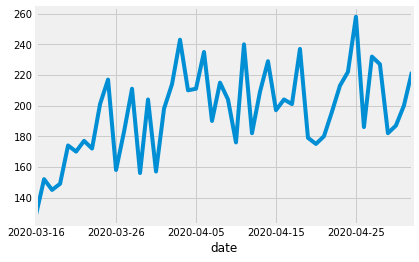

In [59]:
countsAfterByDescription(policeCalls, "DISTURBING PEACE")

In [ ]:
_ = ok.grade('q4_2_1')

**Question 2**: Define a function, `correlation`, that takes in 2 arrays, a and b, and returns the correlation coefficient between them.

In [60]:
def correlation(a, b):
    z = lambda x: (x - x.mean())/np.std(x)
    return np.mean(z(a.values) * z(b.values))

In [ ]:
_ = ok.grade('q4_2_2')

**Question 3**: Next, we are going to put things together by exploring the correlations of different police calls and the date, which will give insight of whether the trend is increasing or not, relative to other trends. We can then explore which trends are changing more significantly than others.

Fill in the function below that takes in a table and description and returns the slope for only police calls that ocurred after 3-15. Most of it has been filled out for you.

In [61]:
def getSlope(table, description):
    y = getCountsByDayAfter(filterByDescription(table, description))
    x = bpd.DataFrame().assign(x = np.arange(y.shape[0])).get("x")
    m = correlation(x, y) * np.std(y) / np.std(x)
    return m

In [ ]:
_ = ok.grade('q4_2_3')

**Question 4**: Now that we have the function above, we can explore to see which call types have increasing or decreasing trends. Of the following, which call types have a positive slope, meaning the trend has been relatively increasing after 3-15? Assign possible call types to a list `positive_trends` (assign the numbers 1, 2, 3, or 4, not the name).

1. DISTURBING PEACE
2. ILLEGAL PARKING
3. DRUNK - DRUGS/ALCOHOL
4. BURGLARY ALARM

You may use the function `getSlope` you defined previously to find the slopes of the call types.

In [ ]:
#You may use this to calculate slopes
getSlope(..., ...)

In [62]:
positive_trends = [1, 3]

In [ ]:
_ = ok.grade('q4_2_4')

Now that you've chosen some call types that have a positive trend, let's plot out the time-series to see if this is consistent. We will use the `countsAfterByDescription` function to do this. Replace the `description` variable with the names of the descriptions you chose above.

In [ ]:
description = ...
countsAfterByDescription(policeCalls, description)

**Question 5**: We will now look at decreasing trends. Of the following, which call types have a negative slope, meaning the trend has been relatively decreasing after 3-15? Assign possible call types to a list negative_trends (assign the numbers 1, 2, 3, or 4, not the name).

1. SPECIAL DETAIL
2. TRESPASSING
3. SELECTIVE ENFORCEMENT
4. ILLEGAL PARKING

Again, you may use the function getSlope you defined previously to find the slopes of the call types.

In [ ]:
#You may use this to calculate slopes
getSlope(..., ...)

In [63]:
negative_trends = [3, 4]

In [ ]:
_ = ok.grade('q4_2_5')

We can do the same thing and look at the trends of the decreasing call types. Replace the `description` variable with the names of the descriptions you chose above.

In [ ]:
description = ...
countsAfterByDescription(policeCalls, description)

**Question 6**: After conducting our analyses, we can see that calls regarding "DISTURBING PEACE" have increased significantly after 3-15. An important part of being a data scientist is to interpret and connect the results and explain reasons for what occurred. 

Given the COVID-19 situation and many of the shelter-in-place orders that have been enforced to make people stay at home, given a possible explanation of why calls regarding "DISTURBING PEACE" may have increased during this time period. 

Calls regarding "DISTURBING PEACE" include situations like excess partying and loud noises that disturbs others.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

We took our analyses from the previous parts a step further and determined the correlations/slopes of the different types of police reports, versus the date. This is called time-series regression and has generated insight as to whether trends of some calls have increased, decreased, or remained relatively the same.

### Summary
The COVID-19 situation has affected many areas of society, including crime rates and police reports. In this part, we have used statistical analyses and data visualization to understand how police calls have changed because of COVID-19. Furthermore, we also quantified the extent to which call types changed and understood why certain types of calls increased or decreased.

## Part 5: Conclusion & Reflection
We've made it to the end of our analysis of two different datasets, answering interesting questions about each. 

**Question 1**: In 2 paragraphs, each with 4-6 sentences, explain what you have learned throughout this project.

For the first paragraph, what have you discovered about women enrollment rates from the past to the present? How have these rates changed, and what do you think will happen to the rates potentially in the future? Feel free to discuss any other insights you have discovered as well.

For the second paragraph, what have you learned about the changes in police call trends before and after the COVID-19 situation? Have certain call types changed more than others? What are examples of some that increased or decreased, and a possible expalanation?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here, replacing this text.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Congratulations! You've made it to the end of the project and have explored questions about both gender discrimination in college admissions, as well as police call trends affected by the COVID-19 situation. There are many more questions and analyses you can perform with the data and we encourage you to explore the data more! Remember to check all the tests and submit the project below when you are completed.

### Further reading

If you're interested in learning more about the topics we've covered, you can check out these articles:

**College Admissions**
* [Discrimination Against Women in College Admissions](https://www.vox.com/2015/2/17/8050259/discrimination-against-women-is-a-real-problem-in-college-admissions)
* [Gender Discrimination Lawsuits](https://law.jrank.org/pages/5368/Colleges-Universities-Gender-Discrimination.html)

**Police Reports**
* [Crime Report Trends during COVID-19 Shutdown](https://sanjosespotlight.com/san-jose-police-chief-talks-crime-trends-during-covid-19-shutdown/)
* [Increases/Decreases in Types of Police Reports during COVID-19](https://www.koin.com/news/health/coronavirus/covid-crime-trends-speeding-break-ins-domestic-violence/)

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

## Before submitting, select "Kernel" -> "Restart & Run All" from the menu!

Then make sure that all of your cells ran without error.

In [ ]:
_ = ok.submit()